In [775]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [776]:
# Reading the loan data
loan_data = pd.read_csv('loan.csv');
loan_data.head()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15060\3614355125.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data = pd.read_csv('loan.csv');


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [777]:
# Using low_memory=False for above warning
loan_data = pd.read_csv('loan.csv', low_memory=False);
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [778]:
# Understanding the number of rows and columns
loan_data.shape

# Rows -- 39717 and Columns -- 111

(39717, 111)

In [779]:
# Missing value check
loan_data.isna().sum()

# Most of the columns have null value == total no. of rows . Meaning entire column is null

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [780]:
# Percentage of data that is missing
100*loan_data.isna().mean()

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [781]:
# Taking care of missing values
# Any col with >40% of missing values should not be ideally considered as a part of the analysis

missing_percentage = 100*loan_data.isna().mean()
cols_to_drop = missing_percentage[missing_percentage > 40].index

# List of columns having missing values more than 40%
cols_to_drop

Index(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_t

In [782]:
# Number of columns with missing values more than 40%
cols_to_drop.size

57

In [783]:
# Dropping these columns 
loan_data = loan_data.drop(columns=cols_to_drop)

In [784]:
loan_data.shape

# After dropping the above columns , updated data has 39717 rows and 54 columns

(39717, 54)

In [785]:
# Missing value check
loan_data.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12942
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [786]:
# Analysing 'pub_rec' column
loan_data['pub_rec'].value_counts()

pub_rec
0    37601
1     2056
2       51
3        7
4        2
Name: count, dtype: int64

In [787]:
loan_data['pub_rec'].isna().sum()

0

In [788]:
# Analysing 'pub_rec_bankruptcies' column
loan_data['pub_rec_bankruptcies'].value_counts()

pub_rec_bankruptcies
0.0    37339
1.0     1674
2.0        7
Name: count, dtype: int64

In [789]:
loan_data['pub_rec_bankruptcies'].isna().sum()

697

In [790]:
# Impute the pub_rec_bankruptcies column with mode value
loan_data['pub_rec_bankruptcies'] = loan_data['pub_rec_bankruptcies'].fillna(loan_data['pub_rec_bankruptcies'].mode()[0])
loan_data['pub_rec_bankruptcies'].value_counts()

pub_rec_bankruptcies
0.0    38036
1.0     1674
2.0        7
Name: count, dtype: int64

In [791]:
loan_data['pub_rec_bankruptcies'].isna().sum()

0

In [792]:
# Dropping more columns that do not help in our analysis.
# loan id,customer id, url to the LC page, loan description provided by the customer and inquiries made in last 6 months
loan_data = loan_data.drop(columns=['id','member_id','url','desc','inq_last_6mths'])

In [793]:
loan_data.shape

(39717, 49)

In [794]:
# Check for tax_liens
loan_data['tax_liens'].value_counts()

tax_liens
0.0    39678
Name: count, dtype: int64

In [795]:
loan_data['tax_liens'].isna().sum()

39

In [796]:
# Dropping tax_liens column as 39678 values out of 39717 are 0.0 and rest 39 are null values.
loan_data = loan_data.drop(columns=['tax_liens'])
loan_data.shape

(39717, 48)

In [797]:
# Check for title and purpose columns
loan_data['title'].value_counts()

title
Debt Consolidation                  2184
Debt Consolidation Loan             1729
Personal Loan                        659
Consolidation                        517
debt consolidation                   505
                                    ... 
your rate is better than my rate       1
Concession Trailer                     1
gregs                                  1
EZover                                 1
JAL Loan                               1
Name: count, Length: 19615, dtype: int64

In [798]:
loan_data['purpose'].value_counts()

purpose
debt_consolidation    18641
credit_card            5130
other                  3993
home_improvement       2976
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
vacation                381
house                   381
educational             325
renewable_energy        103
Name: count, dtype: int64

In [799]:
# 'purpose' column can give more meaningfull insights (can be considered as categorised variable) than the title hence dropping the title column
loan_data = loan_data.drop(columns=['title'])

In [800]:
# Columns left and their null count
loan_data.isna().sum()

loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_title                     2459
emp_length                    1075
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
purpose                          0
zip_code                         0
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
open_acc                         0
pub_rec                          0
revol_bal                        0
revol_util                      50
total_acc                        0
initial_list_status              0
out_prncp           

In [801]:
# 'application_type' has only one value 'INDIVIDUAL', hence dropping the column
loan_data['application_type'].value_counts()

application_type
INDIVIDUAL    39717
Name: count, dtype: int64

In [802]:
# 'policy_code' code has only one value '1', hence dropping the column
loan_data['policy_code'].value_counts()

policy_code
1    39717
Name: count, dtype: int64

In [803]:
# 'collections_12_mths_ex_med' has only one value 0.0 , hence this col wont be useful
loan_data['collections_12_mths_ex_med'].value_counts()

collections_12_mths_ex_med
0.0    39661
Name: count, dtype: int64

In [804]:
# Dropping more columns that wont be of any use 
loan_data = loan_data.drop(columns=['pymnt_plan','zip_code','last_credit_pull_d','out_prncp','initial_list_status','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','application_type','policy_code','collections_12_mths_ex_med','last_credit_pull_d','recoveries','collection_recovery_fee'])

In [805]:
loan_data.shape

(39717, 34)

In [806]:
# Columns left and their null count
loan_data.isna().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title               2459
emp_length              1075
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                50
total_acc                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
last_pymnt_d              71
last_pymnt_amnt            0
pub_rec_bankruptcies       0
dtype: int64

In [807]:
# For 'revol_util' column

loan_data['revol_util'].value_counts()

revol_util
0%        977
0.20%      63
63%        62
40.70%     58
66.70%     58
         ... 
25.74%      1
47.36%      1
24.65%      1
10.61%      1
7.28%       1
Name: count, Length: 1089, dtype: int64

In [808]:
# Correcting the type of data as it has '%''
loan_data['revol_util'] = loan_data['revol_util'].str.rstrip('%').astype('float')/100

In [809]:
loan_data['revol_util'].value_counts()

revol_util
0.0000    977
0.0020     63
0.6300     62
0.4070     58
0.6670     58
         ... 
0.2574      1
0.4736      1
0.2465      1
0.1061      1
0.0728      1
Name: count, Length: 1089, dtype: int64

In [810]:
# Getting the statistical info about the column
loan_data['revol_util'].describe()

count    39667.000000
mean         0.488322
std          0.283326
min          0.000000
25%          0.254000
50%          0.493000
75%          0.724000
max          0.999000
Name: revol_util, dtype: float64

In [811]:
# Imputing the missing values with the mean
loan_data['revol_util'] = loan_data['revol_util'].fillna(loan_data['revol_util'].mean())

In [812]:
# Checking the null value count
loan_data['revol_util'].isna().sum()

0

In [813]:
# Now , dropping the 'last_pymnt_d' column as this wont add any insights for charged off loans
loan_data = loan_data.drop(columns='last_pymnt_d')

In [814]:
# Analysing column 'emp_title'
loan_data['emp_title'].value_counts()


emp_title
US Army                              134
Bank of America                      109
IBM                                   66
AT&T                                  59
Kaiser Permanente                     56
                                    ... 
Community College of Philadelphia      1
AMEC                                   1
lee county sheriff                     1
Bacon County Board of Education        1
Evergreen Center                       1
Name: count, Length: 28820, dtype: int64

In [815]:
# Since 'emp_title' is not a category data , no proper conclusion can be drawn from as to how this might affect repayment of loans
# Hence dropping this column
loan_data = loan_data.drop(columns='emp_title')

In [816]:
loan_data.isna().sum()


loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length              1075
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
last_pymnt_amnt            0
pub_rec_bankruptcies       0
dtype: int64

In [817]:
# Handling missing values for column 'emp_length'
loan_data['emp_length'].value_counts()

emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64

In [818]:
loan_data['emp_length'] = loan_data['emp_length'].fillna(loan_data['emp_length'].mode()[0])
loan_data['emp_length'].isna().sum()

0

In [819]:
loan_data['emp_length'] = loan_data['emp_length'].str.replace('< 1 year', '0')
loan_data['emp_length'] = loan_data['emp_length'].str.replace('years', '')
loan_data['emp_length'] = loan_data['emp_length'].str.replace('year', '')
loan_data['emp_length'] = loan_data['emp_length'].str.replace('+', '')

In [820]:
loan_data['emp_length'].value_counts()

emp_length
10     9954
0      4583
2      4388
3      4095
4      3436
5      3282
1      3240
6      2229
7      1773
8      1479
9      1258
Name: count, dtype: int64

In [821]:
# Analysing 'int_rate' column
loan_data['int_rate'].value_counts()

int_rate
10.99%    956
13.49%    826
11.49%    825
7.51%     787
7.88%     725
         ... 
18.36%      1
16.96%      1
16.15%      1
16.01%      1
17.44%      1
Name: count, Length: 371, dtype: int64

In [822]:
# For 'int_rate' removing % and changing the datatype to float
loan_data['int_rate'] = loan_data['int_rate'].str.rstrip('%').astype('float')

In [823]:
# For 'home_ownership' column
loan_data['home_ownership'].value_counts()

home_ownership
RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
NONE            3
Name: count, dtype: int64

In [824]:
# Since 'home_ownership' cannot be NONE , hence replacing the 3 entries for NONE with RENT since it is the mode
loan_data['home_ownership'] = loan_data['home_ownership'].replace('NONE','RENT')
loan_data['home_ownership'].value_counts()

home_ownership
RENT        18902
MORTGAGE    17659
OWN          3058
OTHER          98
Name: count, dtype: int64

In [825]:
# Analysing 'loan_status' column
loan_data['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [826]:
# Removing the data with loan status as 'Current' as not required for the analysis
loan_data = loan_data[loan_data['loan_status']!='Current']
loan_data['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Name: count, dtype: int64

In [827]:
# Analysing 'verification_status' column
loan_data['verification_status'].value_counts()

verification_status
Not Verified       16694
Verified           12206
Source Verified     9677
Name: count, dtype: int64

In [828]:
# ----------------------------Understanding categorical variables----------------------------------------------

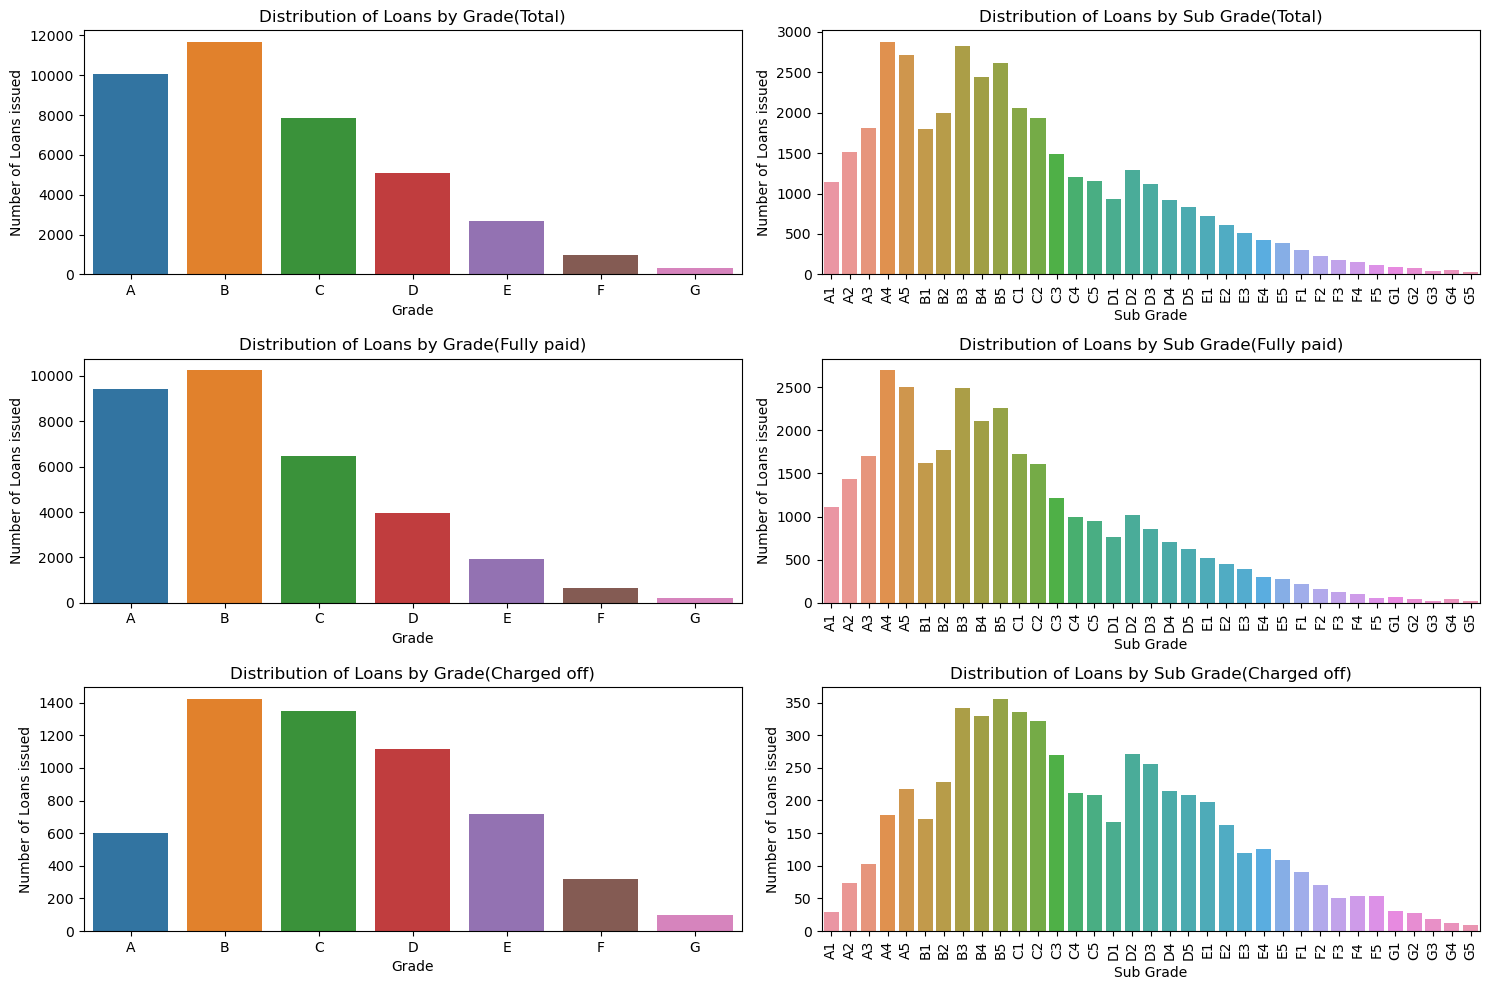

In [909]:
# Plotting graph by grade and sub_grades
plt.figure(figsize=(15,10))

# Total loans
plt.subplot(3,2,1)
sns.countplot( x="grade", data=loan_data,order = np.sort(loan_data['grade'].unique()))
plt.title("Distribution of Loans by Grade(Total)")
plt.xlabel("Grade")
plt.ylabel("Number of Loans issued")

plt.subplot(3,2,2)
sns.countplot( x="sub_grade", data=loan_data, order = np.sort(loan_data['sub_grade'].unique()))
plt.title("Distribution of Loans by Sub Grade(Total)")
plt.xlabel("Sub Grade")
plt.ylabel("Number of Loans issued")
plt.xticks(rotation=90)

# Fully paid loans
plt.subplot(3,2,3)
sns.countplot( x="grade", data=loan_data[loan_data['loan_status'] == "Fully Paid"],order = np.sort(loan_data['grade'].unique()))
plt.title("Distribution of Loans by Grade(Fully paid)")
plt.xlabel("Grade")
plt.ylabel("Number of Loans issued")

plt.subplot(3,2,4)
sns.countplot( x="sub_grade", data=loan_data[loan_data['loan_status'] == "Fully Paid"], order = np.sort(loan_data['sub_grade'].unique()))
plt.title("Distribution of Loans by Sub Grade(Fully paid)")
plt.xlabel("Sub Grade")
plt.ylabel("Number of Loans issued")
plt.xticks(rotation=90)

# Charged off loans
plt.subplot(3,2,5)
sns.countplot( x="grade", data=loan_data[loan_data['loan_status'] == "Charged Off"],order = np.sort(loan_data['grade'].unique()))
plt.title("Distribution of Loans by Grade(Charged off)")
plt.xlabel("Grade")
plt.ylabel("Number of Loans issued")

plt.subplot(3,2,6)
sns.countplot( x="sub_grade", data=loan_data[loan_data['loan_status'] == "Charged Off"], order = np.sort(loan_data['sub_grade'].unique()))
plt.title("Distribution of Loans by Sub Grade(Charged off)")
plt.xlabel("Sub Grade")
plt.ylabel("Number of Loans issued")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [830]:
# Conclusion from above graphs
# 1. More loans are disbursed to grades A, B and C .Least number of loans were given to grades F and G.
# 2. However , more charged off loans belongs to grade B and C and sub grades B5,B3,B4,C1,C2.

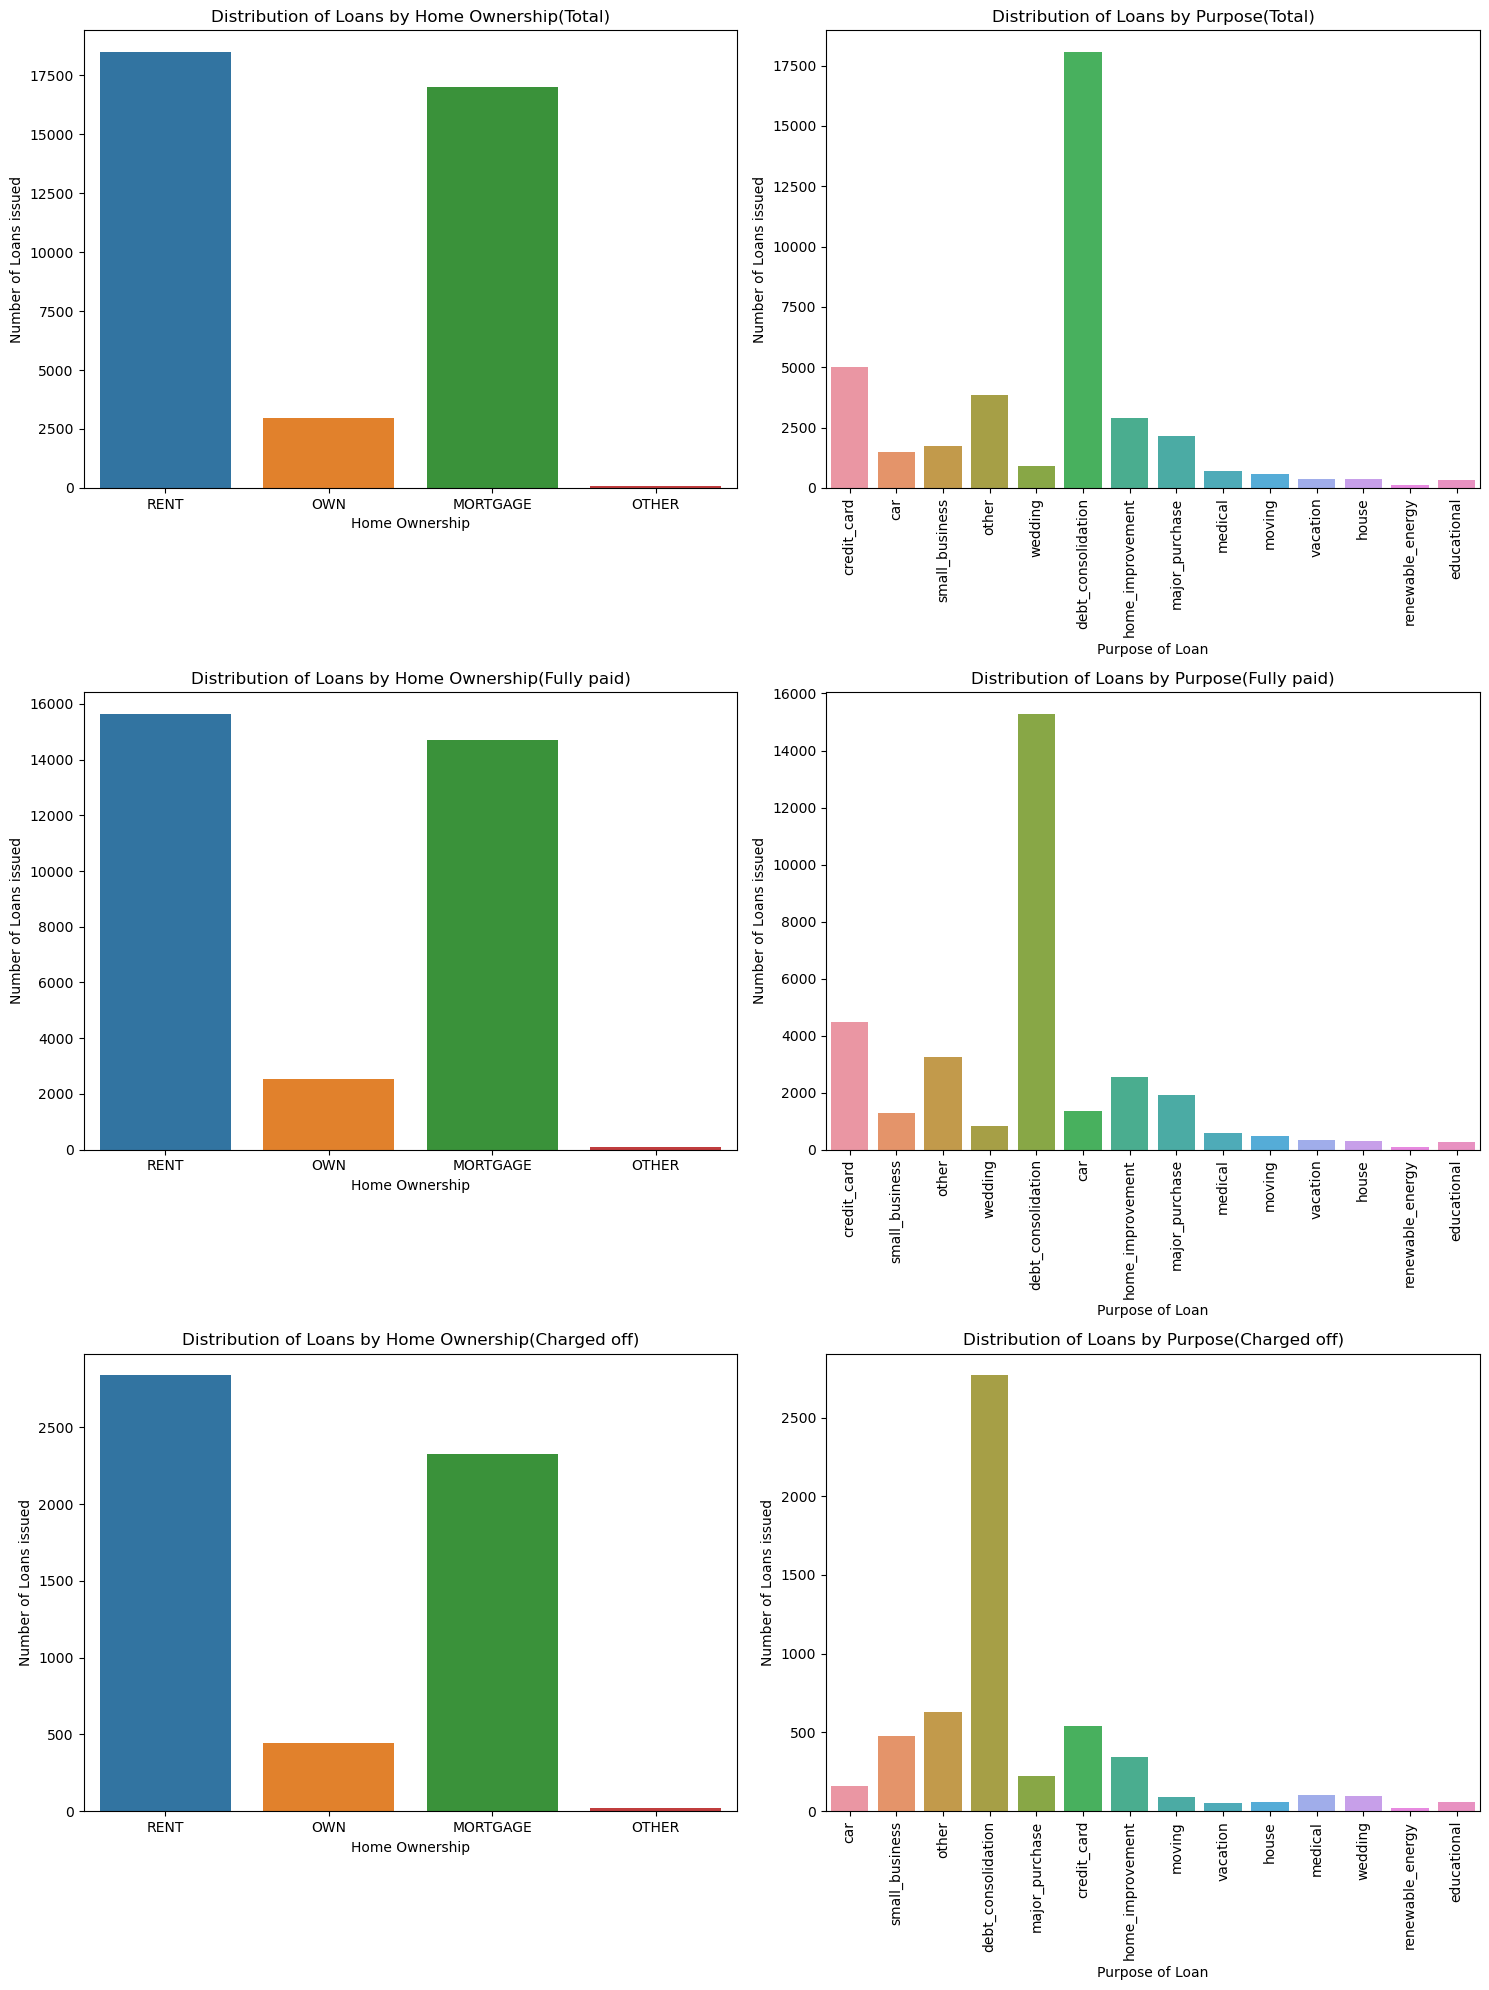

In [907]:
# Plotting the graph by 'home_ownership' and 'purpose'
plt.figure(figsize=(15,20))

# Total loans
plt.subplot(3,2,1)
sns.countplot( x="home_ownership", data=loan_data)
plt.title("Distribution of Loans by Home Ownership(Total)")
plt.xlabel("Home Ownership")
plt.ylabel("Number of Loans issued")

plt.subplot(3,2,2)
sns.countplot( x="purpose", data=loan_data)
plt.title("Distribution of Loans by Purpose(Total)")
plt.xlabel("Purpose of Loan")
plt.ylabel("Number of Loans issued")
plt.xticks(rotation=90)

# Fully paid loans
plt.subplot(3,2,3)
sns.countplot( x="home_ownership", data=loan_data[loan_data['loan_status'] == "Fully Paid"])
plt.title("Distribution of Loans by Home Ownership(Fully paid)")
plt.xlabel("Home Ownership")
plt.ylabel("Number of Loans issued")

plt.subplot(3,2,4)
sns.countplot( x="purpose", data=loan_data[loan_data['loan_status'] == "Fully Paid"])
plt.title("Distribution of Loans by Purpose(Fully paid)")
plt.xlabel("Purpose of Loan")
plt.ylabel("Number of Loans issued")
plt.xticks(rotation=90)


# Charged off loans
plt.subplot(3,2,5)
sns.countplot( x="home_ownership", data=loan_data[loan_data['loan_status'] == "Charged Off"])
plt.title("Distribution of Loans by Home Ownership(Charged off)")
plt.xlabel("Home Ownership")
plt.ylabel("Number of Loans issued")

plt.subplot(3,2,6)
sns.countplot( x="purpose", data=loan_data[loan_data['loan_status'] == "Charged Off"])
plt.title("Distribution of Loans by Purpose(Charged off)")
plt.xlabel("Purpose of Loan")
plt.ylabel("Number of Loans issued")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [832]:
# Conclusion from above graphs
# 1. More loans are disbursed to/taken by people staying on rent.
# 2. Main purpose of loan is debt consolidation and paying credit cards bills.
# 3. However, most of the charged off loans were taken for debt consolidation.

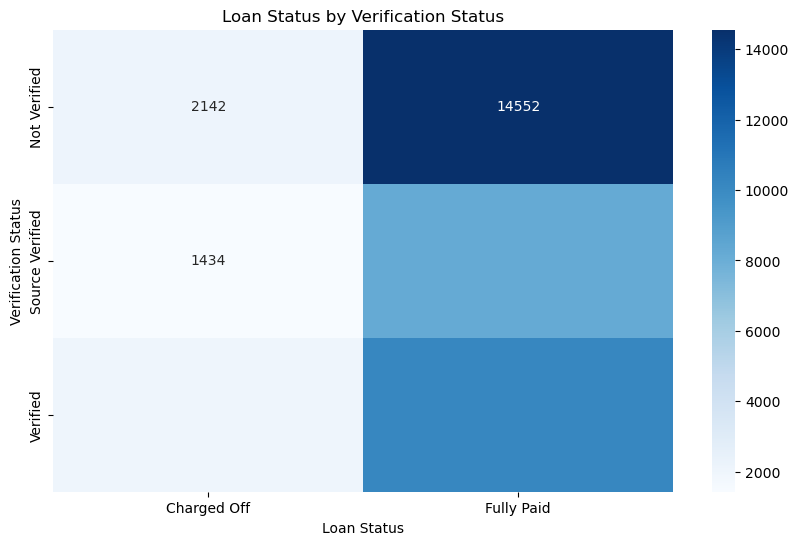

In [834]:
# Visualizing the relationship between two categorical variables (verification_status and loan_status) together
ct = pd.crosstab(loan_data['verification_status'], loan_data['loan_status'])

plt.figure(figsize=(10, 6))
sns.heatmap(ct, annot=True, fmt='d', cmap='Blues')
plt.title('Loan Status by Verification Status')
plt.xlabel('Loan Status')
plt.ylabel('Verification Status')
plt.show()

In [835]:
# Conclusion from above graphs
# 1. Most of the loans were disburded to people whose proper verification was not conducted.
# 2. Most of the loans are paid off , there are very few which were charged off.
# 3. However , most of the non-verified loans are paid off hence the nature of loan re-payment is not dependent upon the verification status.

In [836]:
# --------------------------------------Creating derived columns----------------------------------------------------
# Creating month and year columns using 'issue_d' column
loan_data['issue_d'] = pd.to_datetime(loan_data['issue_d'], format='%b-%y')
loan_data['issued_month'] = loan_data['issue_d'].dt.month
loan_data['issued_year'] = loan_data['issue_d'].dt.year

In [837]:
loan_data['issued_month'].value_counts()

issued_month
12    4215
11    4006
10    3761
9     3498
8     3388
7     3351
6     3180
5     2919
4     2831
3     2691
1     2379
2     2358
Name: count, dtype: int64

In [838]:
loan_data['issued_year'].value_counts()

issued_year
2011    20516
2010    11532
2009     4716
2008     1562
2007      251
Name: count, dtype: int64

In [839]:
# Dropping 'issue_d' as not required 
loan_data = loan_data.drop(columns=['issue_d'])

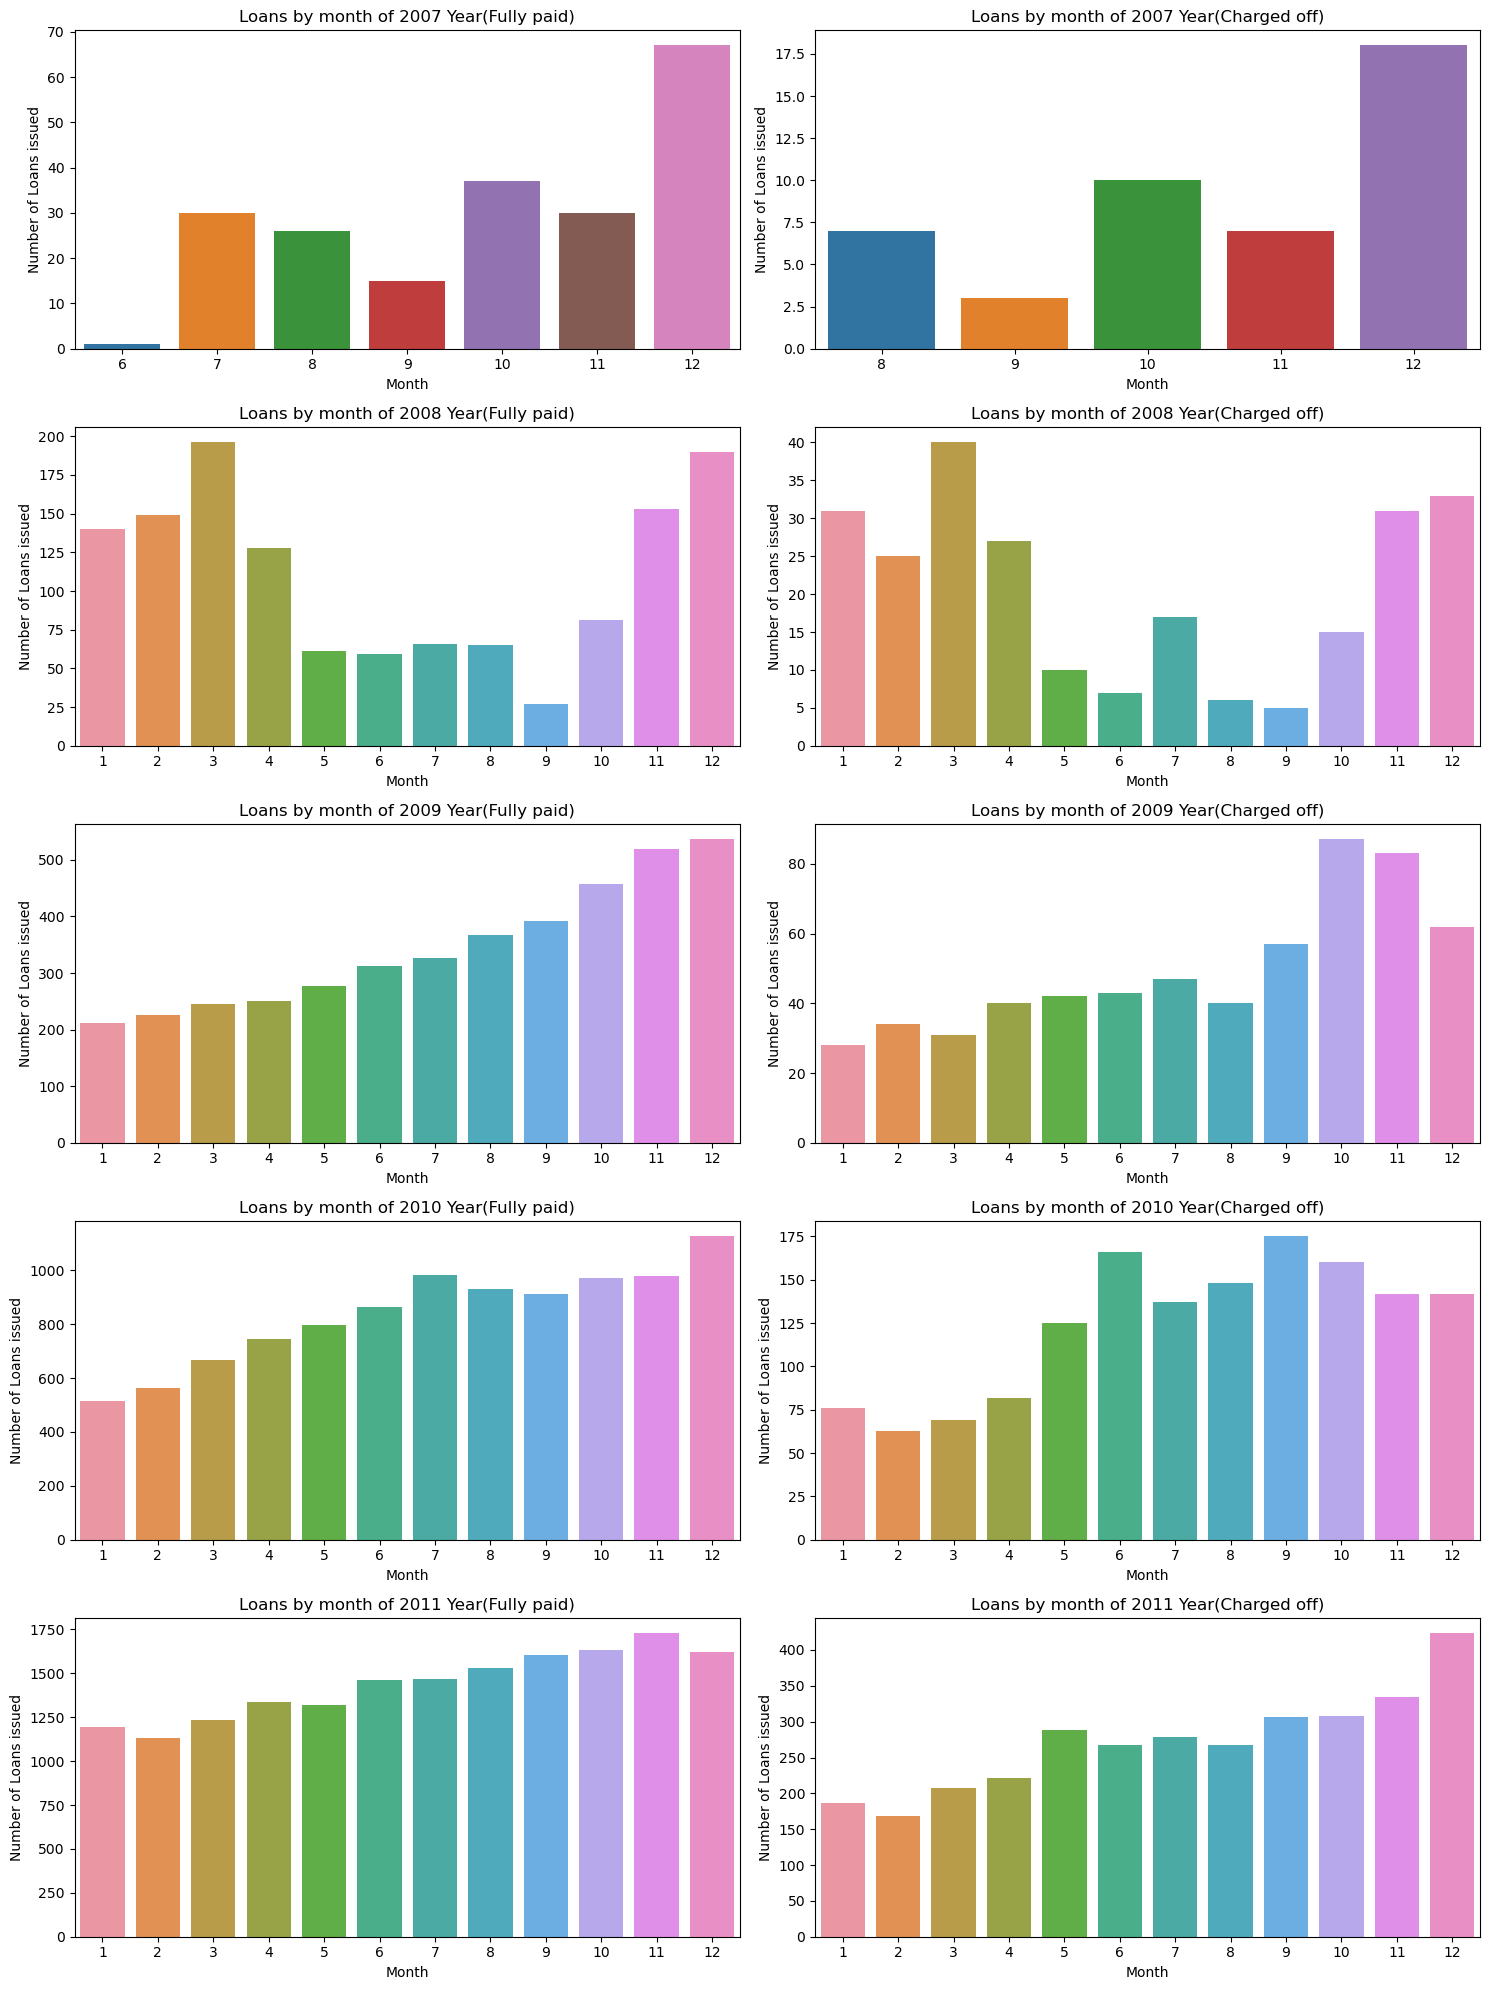

In [917]:
# Plotting the graph for number of loans issued on every month of each year
plt.figure(figsize=(15,20))

plt.subplot(5,2,1)
sns.countplot(x="issued_month", data=loan_data[(loan_data['issued_year']==2007) & (loan_data['loan_status'] == "Fully Paid")])
plt.title("Loans by month of 2007 Year(Fully paid)")
plt.xlabel("Month")
plt.ylabel("Number of Loans issued")

plt.subplot(5,2,2)
sns.countplot(x="issued_month", data=loan_data[(loan_data['issued_year']==2007) & (loan_data['loan_status'] == "Charged Off")])
plt.title("Loans by month of 2007 Year(Charged off)")
plt.xlabel("Month")
plt.ylabel("Number of Loans issued")

plt.subplot(5,2,3)
sns.countplot(x="issued_month", data=loan_data[(loan_data['issued_year']==2008) & (loan_data['loan_status'] == "Fully Paid")])
plt.title("Loans by month of 2008 Year(Fully paid)")
plt.xlabel("Month")
plt.ylabel("Number of Loans issued")

plt.subplot(5,2,4)
sns.countplot(x="issued_month", data=loan_data[(loan_data['issued_year']==2008) & (loan_data['loan_status'] == "Charged Off")])
plt.title("Loans by month of 2008 Year(Charged off)")
plt.xlabel("Month")
plt.ylabel("Number of Loans issued")

plt.subplot(5,2,5)
sns.countplot(x="issued_month", data=loan_data[(loan_data['issued_year']==2009) & (loan_data['loan_status'] == "Fully Paid")])
plt.title("Loans by month of 2009 Year(Fully paid)")
plt.xlabel("Month")
plt.ylabel("Number of Loans issued")

plt.subplot(5,2,6)
sns.countplot(x="issued_month", data=loan_data[(loan_data['issued_year']==2009) & (loan_data['loan_status'] == "Charged Off")])
plt.title("Loans by month of 2009 Year(Charged off)")
plt.xlabel("Month")
plt.ylabel("Number of Loans issued")

plt.subplot(5,2,7)
sns.countplot(x="issued_month", data=loan_data[(loan_data['issued_year']==2010) & (loan_data['loan_status'] == "Fully Paid")])
plt.title("Loans by month of 2010 Year(Fully paid)")
plt.xlabel("Month")
plt.ylabel("Number of Loans issued")

plt.subplot(5,2,8)
sns.countplot(x="issued_month", data=loan_data[(loan_data['issued_year']==2010) & (loan_data['loan_status'] == "Charged Off")])
plt.title("Loans by month of 2010 Year(Charged off)")
plt.xlabel("Month")
plt.ylabel("Number of Loans issued")

plt.subplot(5,2,9)
sns.countplot(x="issued_month", data=loan_data[(loan_data['issued_year']==2011) & (loan_data['loan_status'] == "Fully Paid")])
plt.title("Loans by month of 2011 Year(Fully paid)")
plt.xlabel("Month")
plt.ylabel("Number of Loans issued")

plt.subplot(5,2,10)
sns.countplot(x="issued_month", data=loan_data[(loan_data['issued_year']==2011) & (loan_data['loan_status'] == "Charged Off")])
plt.title("Loans by month of 2011 Year(Charged off)")
plt.xlabel("Month")
plt.ylabel("Number of Loans issued")

plt.tight_layout()
plt.show()

In [841]:
# Conclusion from above graphs
# 1. Most of the loans were disbursed at the end of year in the months of October,November and December that is in the holiday season.
# 2. Number of loans disbursed have been increasing from 2007 to 2011 with slight drop in 2008.
# 3. However no conclusion can be drawn for charged off loans.

In [842]:
# """valid_loan_data_for_analysis"""
v_loan_data = loan_data

In [843]:
# Data set for loans that are fully paid
loans_paid_data = v_loan_data[v_loan_data['loan_status'] == "Fully Paid"]
loans_paid_data.shape

(32950, 33)

In [844]:
loans_paid_data['loan_amnt'].describe()

count    32950.000000
mean     10866.455994
std       7199.629493
min        500.000000
25%       5200.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [845]:
# Data set for loans that are charged off
loans_defaulted_data = v_loan_data[v_loan_data['loan_status'] != "Fully Paid"]
loans_defaulted_data.shape

(5627, 33)

In [846]:
loans_defaulted_data['loan_amnt'].describe()

count     5627.000000
mean     12104.385108
std       8085.732038
min        900.000000
25%       5600.000000
50%      10000.000000
75%      16500.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [847]:
len(v_loan_data[v_loan_data['loan_amnt'] < 900])

9

In [848]:
#Observation: People who took lower amounts of loan paid the loan without fail. loan < 900
# but the number of people taking loan below 900 is only 9 so cant draw any conclusion out of it.

In [850]:
loans_paid_data['loan_amnt'].describe()

count    32950.000000
mean     10866.455994
std       7199.629493
min        500.000000
25%       5200.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [851]:
test_df = loans_defaulted_data[ loans_defaulted_data['loan_amnt'] > 25000]
test_df['term'].value_counts()
#loans_defaulted_data['loan_amnt'].describe()
#loans_defaulted_data['term'].value_counts()
test_df1 = loans_paid_data[ loans_paid_data['loan_amnt'] > 15000]
test_df1['term'].value_counts()

term
 36 months    3914
 60 months    3090
Name: count, dtype: int64

In [852]:
loans_paid_data['delinq_2yrs'].value_counts()

delinq_2yrs
0     29450
1      2700
2       543
3       177
4        47
5        18
6         9
7         3
8         1
9         1
11        1
Name: count, dtype: int64

In [853]:
# Analysing charged off loans with respect to term(loan duration)
loans_defaulted_data['term'].value_counts()

term
 36 months    3227
 60 months    2400
Name: count, dtype: int64

In [854]:
# Analysing fully paid loans with respect to term(loan duration)
loans_paid_data['term'].value_counts()

term
 36 months    25869
 60 months     7081
Name: count, dtype: int64

In [855]:
# From total loans, people who opted for 5 year loan plan have aroud 25% defaulters compared to 10% defaulters for 3 year term loan
# From above analysis , this can be concluded that most of the charged off loans were of smaller terms of about 3 years.
# Let us also check other factors affecting both fully paid and charged of loans as shown below.

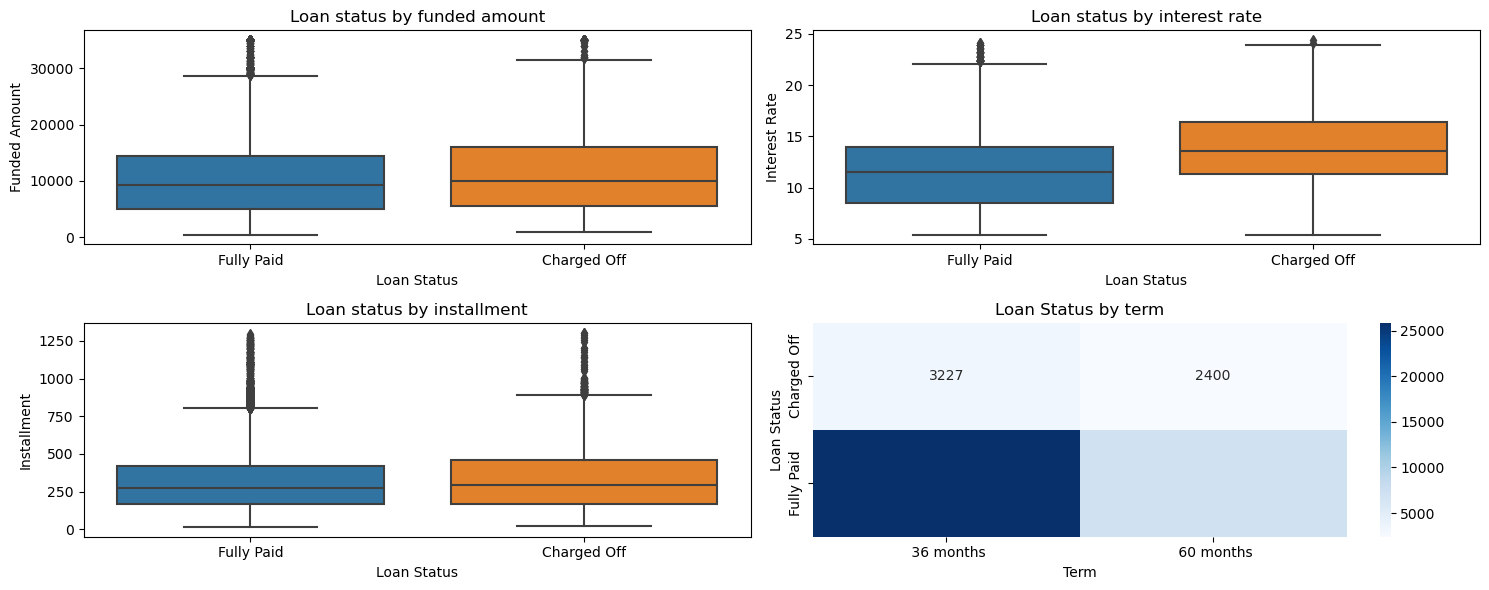

In [856]:
# Visualizing the relationship of loan_status with various other variables for both fully paid loans and charged off loans.

plt.figure(figsize=(15, 6))

plt.subplot(2,2,1)
sns.boxplot(x="loan_status", y="funded_amnt" , data=v_loan_data)
plt.title("Loan status by funded amount")
plt.xlabel("Loan Status")
plt.ylabel("Funded Amount")

plt.subplot(2,2,2)
sns.boxplot(x="loan_status", y="int_rate" , data=v_loan_data)
plt.title("Loan status by interest rate")
plt.xlabel("Loan Status")
plt.ylabel("Interest Rate")

plt.subplot(2,2,3)
sns.boxplot(x="loan_status", y="installment" , data=v_loan_data)
plt.title("Loan status by installment")
plt.xlabel("Loan Status")
plt.ylabel("Installment")

plt.subplot(2,2,4)
ct = pd.crosstab(v_loan_data['loan_status'], v_loan_data['term'])
sns.heatmap(ct, annot=True, fmt='d', cmap='Blues')
plt.title('Loan Status by term')
plt.xlabel('Term')
plt.ylabel('Loan Status')

plt.tight_layout()
plt.show()

In [857]:
# Conclusion from above graphs
# 1. Loans that were charged off had higher funded amounts. This could indicate that higher-risk loans (larger amounts) were more likely to result in defaults or non-payment.
# 2. Loans that were charged off had higher interest rates. Higher interest rates often indicate riskier borrowers or riskier loan terms, which could contribute to a higher likelihood of default.
# 3. There was no significant impact observed based on installment amount. This suggests that the specific amount paid in installments did not strongly influence whether a loan was charged off or fully paid.
# 4. More loans with a term of 3 years (36 months) were charged off compared to loans with a term of 5 years (60 months). Shorter loan terms might indicate loans with higher monthly payments, potentially affecting borrower affordability and repayment capability.

In [858]:
test_data = v_loan_data[v_loan_data['total_rec_late_fee'] > 0]
print(v_loan_data.shape, test_data.shape)
#num of people who had paid late fees

(38577, 33) (1995, 33)


In [859]:
test_data = loans_defaulted_data[loans_defaulted_data['total_rec_late_fee'] > 0]
print(loans_defaulted_data.shape, test_data.shape)
#num of people who had paid late fee and defaulted


(5627, 33) (863, 33)


In [860]:
test_data = loans_paid_data[loans_paid_data['total_rec_late_fee'] > 0]
print(loans_paid_data.shape, test_data.shape)

(32950, 33) (1132, 33)


In [861]:
print("percentage of people who had history of late fee payments and defaulted:", 863/1995)

percentage of people who had history of late fee payments and defaulted: 0.43258145363408523


In [862]:
print("percentage of people who had no history of late fee payments and defaulted:", (5627-863)/(38577-1995))

percentage of people who had no history of late fee payments and defaulted: 0.13022798097424962


In [863]:
#conclusion: People with history of late fee payments will have 43% of becoming defaulters.

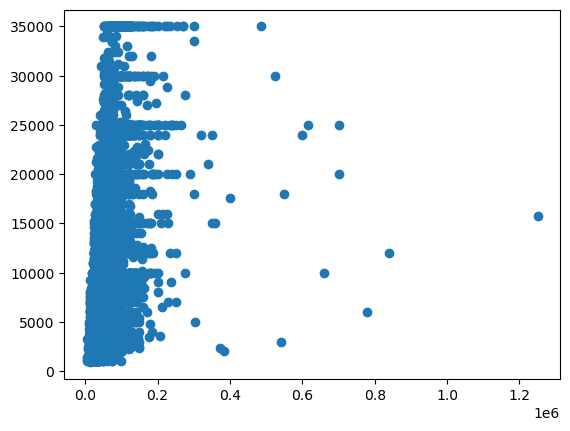

In [864]:


plt.scatter( loans_defaulted_data['annual_inc'], loans_defaulted_data['loan_amnt'])
plt.show()

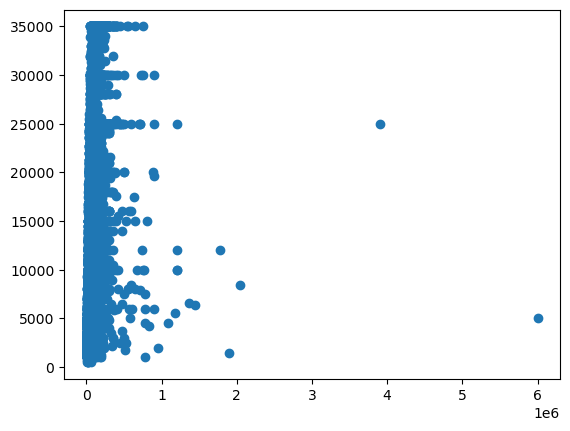

In [865]:
plt.scatter( loans_paid_data['annual_inc'], loans_paid_data['loan_amnt'])
plt.show()

In [866]:
loans_defaulted_data['annual_inc'].describe()


count    5.627000e+03
mean     6.242730e+04
std      4.777601e+04
min      4.080000e+03
25%      3.700000e+04
50%      5.300000e+04
75%      7.500000e+04
max      1.250000e+06
Name: annual_inc, dtype: float64

In [867]:
loans_defaulted_data['loan_amnt'].describe()

count     5627.000000
mean     12104.385108
std       8085.732038
min        900.000000
25%       5600.000000
50%      10000.000000
75%      16500.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [868]:
v_loan_data['dti'].describe()

count    38577.000000
mean        13.272727
std          6.673044
min          0.000000
25%          8.130000
50%         13.370000
75%         18.560000
max         29.990000
Name: dti, dtype: float64

In [869]:
loans_paid_data['dti'].describe()

count    32950.000000
mean        13.148421
std          6.680041
min          0.000000
25%          7.980000
50%         13.200000
75%         18.390000
max         29.990000
Name: dti, dtype: float64

In [870]:
loans_defaulted_data['dti'].describe()

count    5627.000000
mean       14.000624
std         6.585577
min         0.000000
25%         9.050000
50%        14.290000
75%        19.290000
max        29.850000
Name: dti, dtype: float64

In [877]:
loans_defaulted_data["purpose"].value_counts()/v_loan_data["purpose"].value_counts()

purpose
car                   0.106738
credit_card           0.107818
debt_consolidation    0.153254
educational           0.172308
home_improvement      0.120696
house                 0.160763
major_purchase        0.103256
medical               0.155653
moving                0.159722
other                 0.163777
renewable_energy      0.186275
small_business        0.270810
vacation              0.141333
wedding               0.103672
Name: count, dtype: float64

In [878]:
loans_paid_data["purpose"].value_counts()/v_loan_data["purpose"].value_counts()

purpose
car                   0.893262
credit_card           0.892182
debt_consolidation    0.846746
educational           0.827692
home_improvement      0.879304
house                 0.839237
major_purchase        0.896744
medical               0.844347
moving                0.840278
other                 0.836223
renewable_energy      0.813725
small_business        0.729190
vacation              0.858667
wedding               0.896328
Name: count, dtype: float64

In [879]:
#conclusion: Loans given for small bussiness were most defaulted.. TODO: Need to analyze further

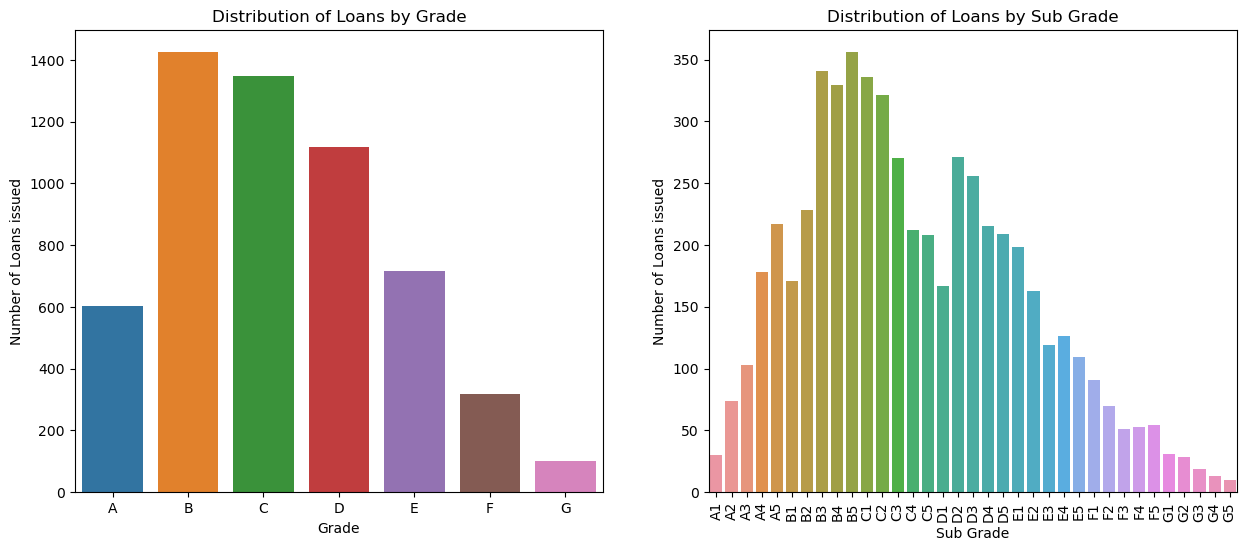

In [880]:
# Plotting graph by grade and sub_grades
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.countplot( x="grade", data= loans_defaulted_data,order = np.sort(loans_defaulted_data['grade'].unique()))
plt.title("Distribution of Loans by Grade")
plt.xlabel("Grade")
plt.ylabel("Number of Loans issued")

plt.subplot(1,2,2)
sns.countplot( x="sub_grade", data=loans_defaulted_data, order = np.sort(loans_defaulted_data['sub_grade'].unique()))
plt.title("Distribution of Loans by Sub Grade")
plt.xlabel("Sub Grade")
plt.ylabel("Number of Loans issued")

# To rotate axis text
plt.xticks(rotation=90)
plt.show()

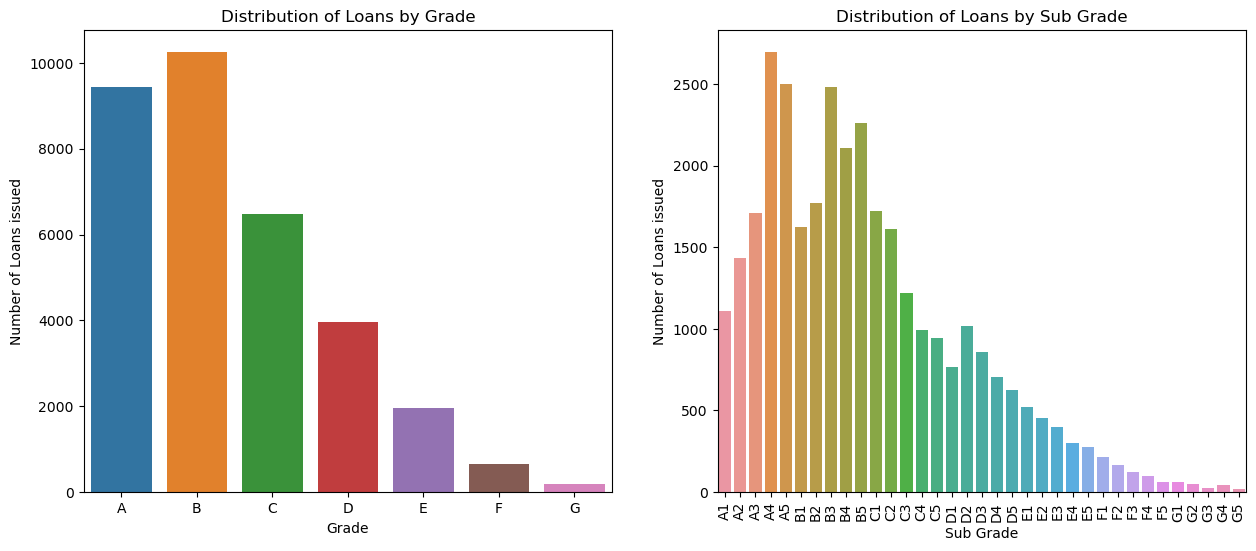

In [881]:
# Plotting graph by grade and sub_grades
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.countplot( x="grade", data= loans_paid_data,order = np.sort(loans_paid_data['grade'].unique()))
plt.title("Distribution of Loans by Grade")
plt.xlabel("Grade")
plt.ylabel("Number of Loans issued")

plt.subplot(1,2,2)
sns.countplot( x="sub_grade", data=loans_paid_data, order = np.sort(loans_paid_data['sub_grade'].unique()))
plt.title("Distribution of Loans by Sub Grade")
plt.xlabel("Sub Grade")
plt.ylabel("Number of Loans issued")

# To rotate axis text
plt.xticks(rotation=90)
plt.show()

In [882]:
loans_defaulted_data["grade"].value_counts()/v_loan_data["grade"].value_counts()

grade
A    0.059930
B    0.122056
C    0.171943
D    0.219862
E    0.268494
F    0.326844
G    0.337793
Name: count, dtype: float64

In [883]:
loans_paid_data["grade"].value_counts()/v_loan_data["grade"].value_counts()

grade
B    0.877944
A    0.940070
C    0.828057
D    0.780138
E    0.731506
F    0.673156
G    0.662207
Name: count, dtype: float64

In [884]:
#conclusion: G grade employees are most likely to be defaulters

In [885]:
loans_defaulted_data["sub_grade"].value_counts()/v_loan_data["sub_grade"].value_counts()

sub_grade
A1    0.026339
A2    0.049072
A3    0.056906
A4    0.061956
A5    0.079926
B1    0.095159
B2    0.113943
B3    0.120708
B4    0.135002
B5    0.136138
C1    0.163504
C2    0.166235
C3    0.181452
C4    0.175788
C5    0.180243
D1    0.179377
D2    0.210731
D3    0.229391
D4    0.234205
D5    0.250600
E1    0.274238
E2    0.265472
E3    0.230620
E4    0.297170
E5    0.281654
F1    0.298361
F2    0.300429
F3    0.293103
F4    0.350993
F5    0.477876
G1    0.329787
G2    0.363636
G3    0.422222
G4    0.240741
G5    0.344828
Name: count, dtype: float64

In [886]:
loans_paid_data["sub_grade"].value_counts()/v_loan_data["sub_grade"].value_counts()


sub_grade
A1    0.973661
A2    0.950928
A3    0.943094
A4    0.938044
A5    0.920074
B1    0.904841
B2    0.886057
B3    0.879292
B4    0.864998
B5    0.863862
C1    0.836496
C2    0.833765
C3    0.818548
C4    0.824212
C5    0.819757
D1    0.820623
D2    0.789269
D3    0.770609
D4    0.765795
D5    0.749400
E1    0.725762
E2    0.734528
E3    0.769380
E4    0.702830
E5    0.718346
F1    0.701639
F2    0.699571
F3    0.706897
F4    0.649007
F5    0.522124
G1    0.670213
G2    0.636364
G3    0.577778
G4    0.759259
G5    0.655172
Name: count, dtype: float64

In [887]:
#conclusion: F4,F5, G2,G3,G5 are more probable to be defaulters

In [888]:
# Analyzing monthly income vs installment for 'loans_defaulted_data' 
loans_defaulted_data['monthly_income'] = np.round(loans_defaulted_data['annual_inc'] / 12).astype(int)
loans_defaulted_data['monthly_income'].value_counts()


# Define the bins
bins = [0, 3000, 5000, 7000, 9000, 11000, 13000, float('inf')]

# Define labels for the bins
bin_labels = ['0-3k', '3k-5k', '5k-7k', '7k-9k', '9k-11k', '11k-13k', '13k+']

# Cut the data into bins
loans_defaulted_data['income_bins'] = pd.cut(loans_defaulted_data['monthly_income'], bins=bins, labels=bin_labels, right=False)

# Count the number of records in each bin
bin_counts = loans_defaulted_data['income_bins'].value_counts().sort_index()

# Print or return the bin counts
print(bin_counts)

income_bins
0-3k       1216
3k-5k      2008
5k-7k      1356
7k-9k       523
9k-11k      258
11k-13k     113
13k+        153
Name: count, dtype: int64


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15060\1021939973.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loans_defaulted_data['monthly_income'] = np.round(loans_defaulted_data['annual_inc'] / 12).astype(int)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15060\1021939973.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loans_defaulted_data['income_bins'] = pd.cut(loans_defaulted_data['monthly_income'], bins=bins, labels=bin_labels, right=False)


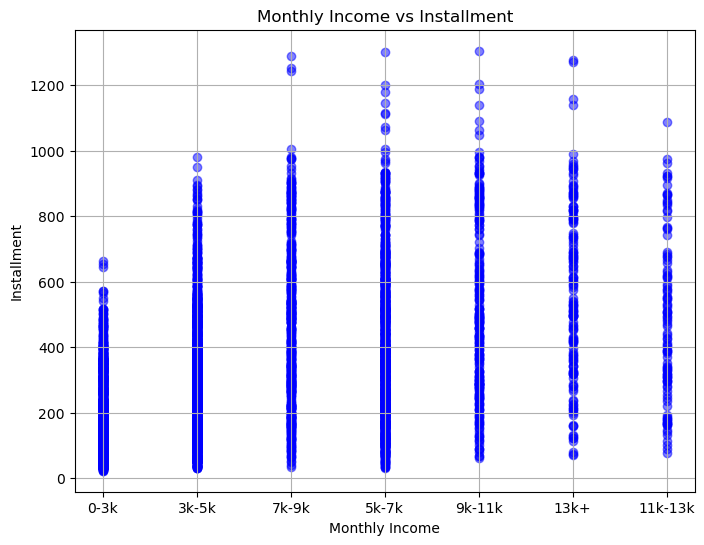

In [889]:
# Plotting monthly income vs installment for 'loans_defaulted_data' 
plt.figure(figsize=(8, 6))
plt.scatter(loans_defaulted_data['income_bins'], loans_defaulted_data['installment'], color='b', alpha=0.5)
plt.title('Monthly Income vs Installment')
plt.xlabel('Monthly Income')
plt.ylabel('Installment')
plt.grid(True)
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15060\2403914185.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loans_paid_data['monthly_income'] = np.round(loans_paid_data['annual_inc'] / 12).astype(int)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15060\2403914185.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loans_paid_data['income_bins'] = pd.cut(loans_paid_data['monthly_income'], bins=bins, labels=bin_labels, right=False)


income_bins
0-3k        5532
3k-5k      10739
5k-7k       8369
7k-9k       4100
9k-11k      2078
11k-13k      895
13k+        1237
Name: count, dtype: int64


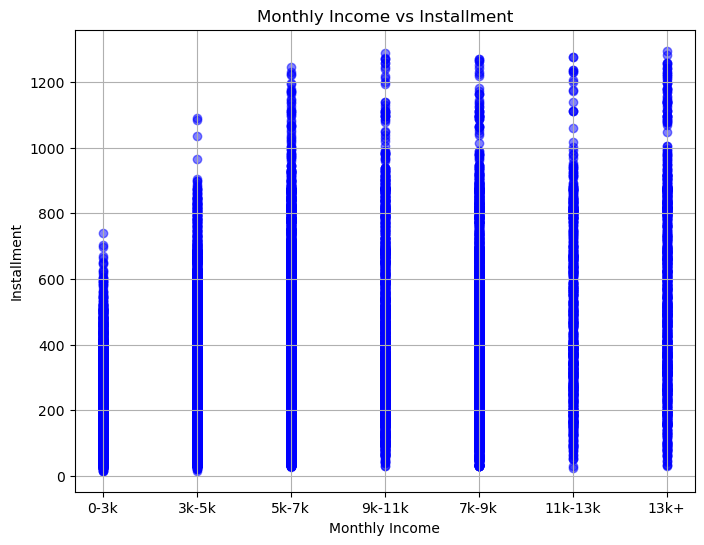

In [890]:
# Analyzing monthly income vs installment for 'loans_paid_data' 
loans_paid_data['monthly_income'] = np.round(loans_paid_data['annual_inc'] / 12).astype(int)
loans_paid_data['monthly_income'].value_counts()

# Define the bins
bins = [0, 3000, 5000, 7000, 9000, 11000, 13000, float('inf')]

# Define labels for the bins
bin_labels = ['0-3k', '3k-5k', '5k-7k', '7k-9k', '9k-11k', '11k-13k', '13k+']

# Cut the data into bins
loans_paid_data['income_bins'] = pd.cut(loans_paid_data['monthly_income'], bins=bins, labels=bin_labels, right=False)

# Count the number of records in each bin
bin_counts = loans_paid_data['income_bins'].value_counts().sort_index()

# Print or return the bin counts
print(bin_counts)


# Plotting monthly income vs installment for 'loans_paid_data' 
plt.figure(figsize=(8, 6))
plt.scatter(loans_paid_data['income_bins'], loans_paid_data['installment'], color='b', alpha=0.5)
plt.title('Monthly Income vs Installment')
plt.xlabel('Monthly Income')
plt.ylabel('Installment')
plt.grid(True)
plt.show()

In [891]:
# No conclusion can be drawn from above graphs

In [892]:
# Analysing employement length attribute for charged off loans
loans_defaulted_data['emp_length'].value_counts()

emp_length
10     1559
0       639
2       567
3       555
4       462
5       458
1       456
6       307
7       263
8       203
9       158
Name: count, dtype: int64

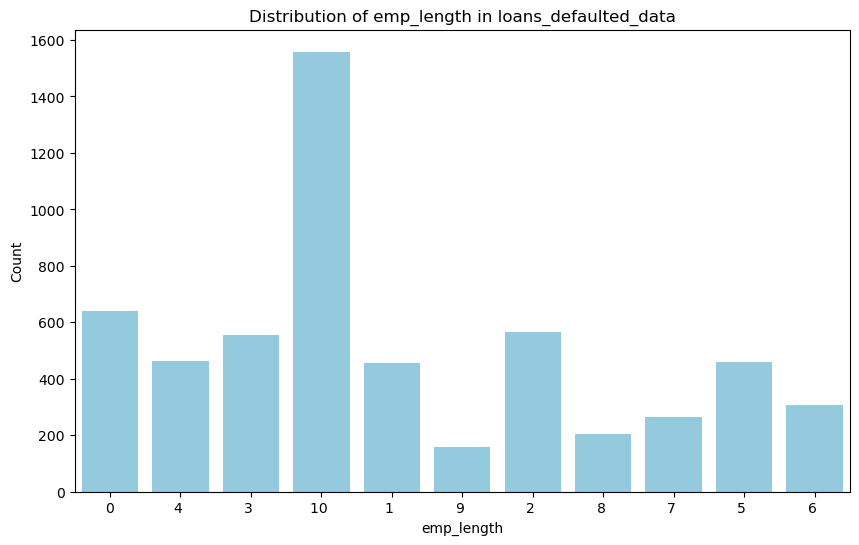

In [893]:
# Plotting
plt.figure(figsize=(10, 6))
sns.countplot(x='emp_length', data=loans_defaulted_data, color='skyblue')
plt.title('Distribution of emp_length in loans_defaulted_data')
plt.xlabel('emp_length')
plt.ylabel('Count')
plt.show()


In [894]:
# Conclusion
# Majority of the loans (that were charged off) were disbursed to borrowers with employement of more than 10 years.
# Hence no such conclusions can be drawn from this.

In [895]:
loan_vs_sal_df = v_loan_data

In [896]:
#creating boolean values for fully paid, defaulted so that it can be used for percentage calculations

loan_vs_sal_df['loan_paid'] = np.where( loan_vs_sal_df['loan_status']== "Fully Paid", 1, 0)

In [897]:
#converting salary column to category variable by creating sub-groups of salaries.

salary_labels = [i for i in range(0,12, 1)]
loan_vs_sal_df['sal_cat'] = pd.cut(loan_vs_sal_df ['annual_inc'], range(15000, 95000, 6500), right=False, labels=salary_labels)
loan_vs_sal_df = loan_vs_sal_df[~loan_vs_sal_df['sal_cat'].isnull()]
loan_vs_sal_df.shape

(30990, 36)

In [898]:
#converting loan amout column to category variable by creating subgroup of loan amnts.

loan_labels = [i for i in range(0,24, 1)]
loan_vs_sal_df['loan_cat'] = pd.cut(loan_vs_sal_df['loan_amnt'], range(0, 37000, 1500), right=False, labels=loan_labels)
loan_vs_sal_df = loan_vs_sal_df[~loan_vs_sal_df['loan_cat'].isnull()]
loan_vs_sal_df.shape

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15060\3003184455.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_vs_sal_df['loan_cat'] = pd.cut(loan_vs_sal_df['loan_amnt'], range(0, 37000, 1500), right=False, labels=loan_labels)


(30990, 37)

In [899]:
#creating pivot table with x axis as salary category, y axis as loan cat and value as percentage of customers charged off.

piv_tab1 = pd.pivot_table(data = loan_vs_sal_df, index='loan_cat', columns='sal_cat', values='loan_paid',aggfunc=lambda x:(100*(x==0).sum())/(((x==0).sum())+((x==1).sum())))
piv_tab1

sal_cat,0,1,2,3,4,5,6,7,8,9,10,11
loan_cat,,,,,,,,,,,,
0,18.181818,19.672131,20.253165,13.483146,2.325581,20.512821,11.363636,6.250000,5.000000,11.111111,0.000000,10.000000
1,19.576720,16.356877,16.049383,12.413793,16.744186,14.746544,14.361702,8.737864,13.829787,12.500000,7.575758,2.500000
2,16.727273,16.923077,11.622276,16.025641,14.397906,10.869565,11.267606,10.377358,11.351351,9.302326,8.571429,10.169492
3,18.781726,16.814159,13.402062,16.296296,13.477089,13.086420,15.856777,15.584416,10.582011,8.333333,9.929078,12.359551
4,13.636364,15.430267,15.919283,12.969925,12.694878,10.792952,11.063830,11.340206,10.943396,6.629834,7.772021,10.810811
5,22.033898,21.717172,13.888889,21.276596,15.479876,14.939024,12.011173,11.981567,10.106383,10.144928,6.535948,9.756098
6,27.777778,21.910112,21.943574,16.443595,12.072893,11.715481,15.101289,8.333333,10.429448,8.715596,10.676157,11.764706
7,50.000000,26.530612,17.204301,18.248175,9.774436,14.173228,10.000000,9.677419,7.894737,10.526316,11.111111,14.285714
8,0.000000,31.944444,22.279793,21.468927,13.448276,14.369501,14.215686,10.612245,13.991770,12.087912,10.550459,5.426357


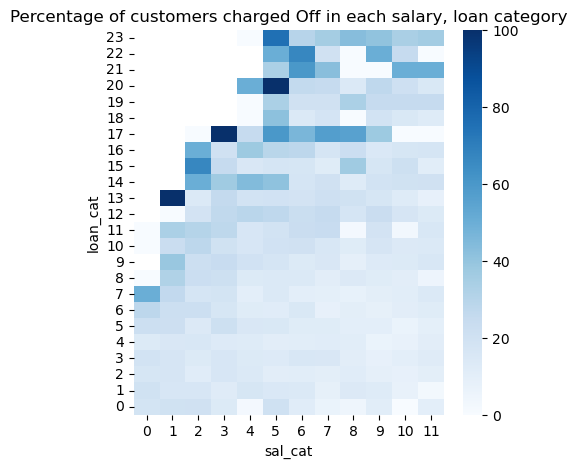

In [900]:
#creating heat map to view the pivot table effeciently

plt.subplots(1,1,figsize=(5,5))
plt.title("Percentage of customers charged Off in each salary, loan category")
t1 = sns.heatmap(piv_tab1, cmap="Blues",annot=False)
t1.invert_yaxis()

In [918]:
# Analysing DTI for charged off loans
# Debt-to-Income Ratio (DTI): This ratio compares the borrower's monthly debt payments (including the proposed loan payment) to their monthly income. A lower DTI suggests that the borrower has more income available to cover additional debt obligations.
# A lower DTI ratio indicates that a smaller portion of a person's income is dedicated to debt repayment, suggesting they have more financial flexibility and may be better able to manage additional debt.

In [928]:
loans_defaulted_data['monthly_income'].value_counts()

monthly_income
5000    256
4167    183
3333    171
2500    139
3000    131
       ... 
5854      1
6867      1
6900      1
7493      1
2832      1
Name: count, Length: 1126, dtype: int64

Mean DTI: 14.000623778212193
Median DTI: 14.29
Minimum DTI: 0.0
Maximum DTI: 29.85
Q1 DTI (25th percentile): 9.05
Q3 DTI (75th percentile): 19.29


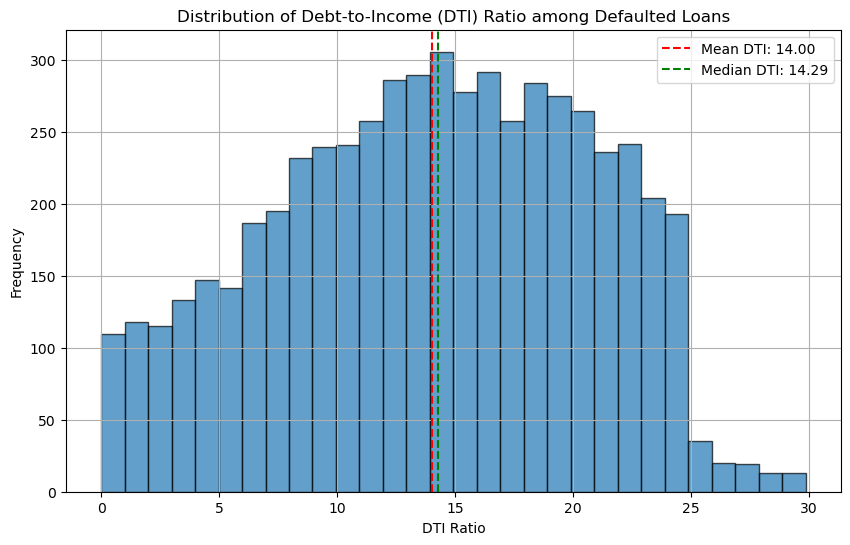

In [936]:

# Extract dti data
dti = loans_defaulted_data['dti']

# Calculate descriptive statistics
mean_dti = np.mean(dti)
median_dti = np.median(dti)
min_dti = np.min(dti)
max_dti = np.max(dti)
q1_dti = np.percentile(dti, 25)
q3_dti = np.percentile(dti, 75)

print(f"Mean DTI: {mean_dti}")
print(f"Median DTI: {median_dti}")
print(f"Minimum DTI: {min_dti}")
print(f"Maximum DTI: {max_dti}")
print(f"Q1 DTI (25th percentile): {q1_dti}")
print(f"Q3 DTI (75th percentile): {q3_dti}")

# Plotting histogram
plt.figure(figsize=(10, 6))
plt.hist(dti, bins=30, edgecolor='black', alpha=0.7)
plt.axvline(mean_dti, color='red', linestyle='dashed', linewidth=1.5, label=f'Mean DTI: {mean_dti:.2f}')
plt.axvline(median_dti, color='green', linestyle='dashed', linewidth=1.5, label=f'Median DTI: {median_dti:.2f}')
plt.title('Distribution of Debt-to-Income (DTI) Ratio among Defaulted Loans')
plt.xlabel('DTI Ratio')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

In [937]:
# Large percentage of people had higher debt to income ratio , hence can be the major reason of loans being charged off